# 1. 관심있는 주제와 이유, 데이터

- 관심있는 주제: 소비자의 구매 행동 분석과 마케팅
- 이유: 특정 프로모션이나 행사가 소비자의 구매율에 미치는 영향을 분석하고, 새로운 마케팅 전략을 세우는 것에 관심이 있습니다.
- 데이터 링크: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

---

# 2. "타이타닉 데이터" EDA & 전처리

## 0. 도메인 살펴보기 : 건강검진정보 데이터

1. 개요
- 타이타닉 호의 승객 데이터: 1912년 4월 15일, 타이타닉 호가 침몰하면서 승객과 승무원 중 다수가 사망한 사건과 관련된 데이터.
- **여성과 아이들 먼저(Women and children first)** 라는 구조 원칙이 적용됨.



2. 데이터 변수 설명
- PassengerId: 승객 고유 식별 번호.
- Survived: 생존 여부 (0 = 사망, 1 = 생존).
- Pclass: 좌석 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석).
- Name: 승객 이름.
- Sex: 성별 (male = 남성, female = 여성).
- Age: 나이.
- SibSp: 함께 탑승한 형제 또는 배우자 수.
- Parch: 함께 탑승한 부모 또는 자녀 수.
- Ticket: 티켓 번호.
- Fare: 티켓 요금.
- Cabin: 객실 번호 (결측치가 많음).
- Embarked: 탑승 항구 (C = Cherbourg, Q = Queenstown, S = Southampton).


## 1. 가설 세우기
- 좌석을 구매할 때 더 많은 돈을 지불할수록 생존률이 더 높을 것이다. 
- 성별에 따라 생존률이 다를 것이다. 
- 나이에 따라 생존률이 다를 것이다. 
- 가족과 함께 탑승한 경우 생존률이 더 높을 것이다.


## 2. 라이브러리 로드 & 한글폰트 설정

In [26]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# 한글폰트 사용을 위해 설치

%pip install koreanize-matplotlib

import koreanize_matplotlib

Note: you may need to restart the kernel to use updated packages.


## 3. 데이터 불러오기

- 12개의 변수(생존 여부, 승객 등급, 성별, 나이 등등)

In [40]:
data=pd.read_csv('Titanic-Dataset.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape


(891, 12)

data.columns

## 4. EDA

### 4.1 데이터 살펴보기

In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4.2 결측치/중복값 확인

In [12]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isna().sum()  # Age에 177개, Cabin에 687개 결측치 존재

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: >

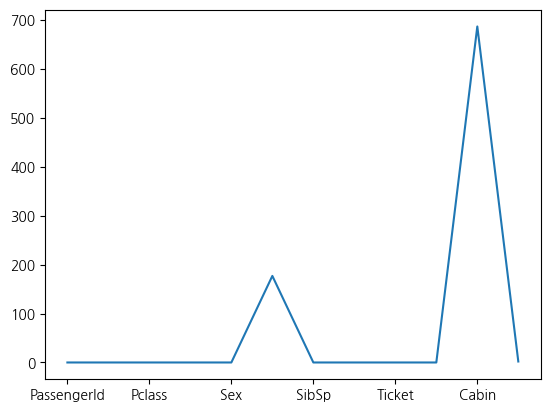

In [27]:
data.isna().sum().plot()

In [29]:
data[data.duplicated()] #중복값 없음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 4-3. 변수별로 특징 확인해보기

1. 시각화

In [30]:
df=data.copy()  #원본데이터 보존을 위해 복사본 생성성

- 성별에 따른 생존자 수 비교

<Axes: xlabel='Sex', ylabel='Survived'>

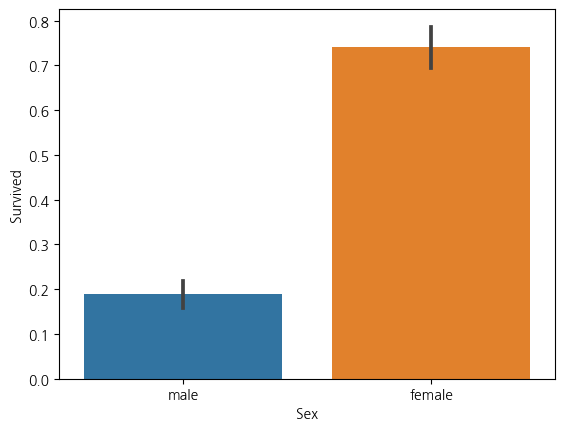

In [31]:
sns.barplot(x='Sex', y='Survived', data=df) #여성의 생존률이 3배이상 높음음

- 나이에 따른 생존률 비교

<Axes: xlabel='Age', ylabel='Survived'>

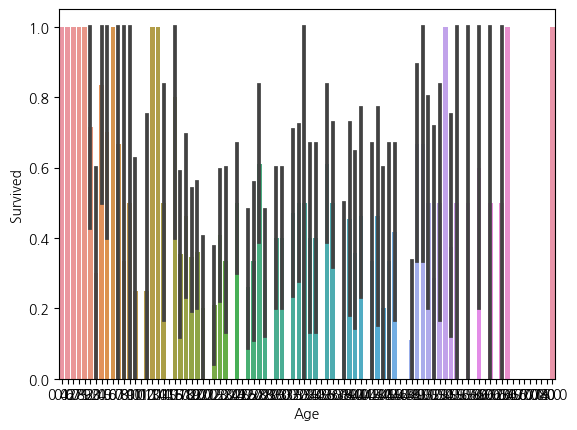

In [32]:
sns.barplot(x='Age', y='Survived', data=df) 

In [37]:
# 나이 범주화 기준
bins = [0, 12, 18, 35, 60, float('inf')]  # 구간 설정
labels = ['Child', 'Teen', 'Young Adult', 'Middle Age', 'Senior']  # 범주 이름

# 나이 범주화
df['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# 범주별 생존률 계산
survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()

print(survival_by_age_group) #나이가 어릴수록 생존률이 높음

AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.382682
Middle Age     0.400000
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\windows\AppData\Local\Temp\ipykernel_29856\2858742715.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()


Text(0, 0.5, 'Survival Rate')

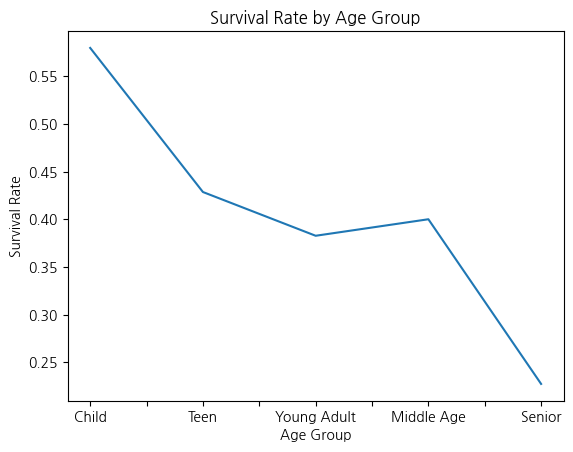

In [ ]:
# 범주별 생존률 시각화
survival_by_age_group.plot()
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')



- 좌석을 구매할 때 지불한 비용에 따른 생존률 비교

In [46]:
df['Pclass'].value_counts()
fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print(fare_by_pclass) #등급이 높을수록 좌석을 구매할 때 지불한 비용이 높음


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [47]:
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
print(survival_by_pclass) #등급이 높을수록 생존률이 높음

# 좌석을 구매할 때 지불한 비용이 높을수록 생존률이 높다.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


- 함께 탑승한 가족의 수에 따른 생존률 비교

family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


Text(0, 0.5, 'Survival Rate')

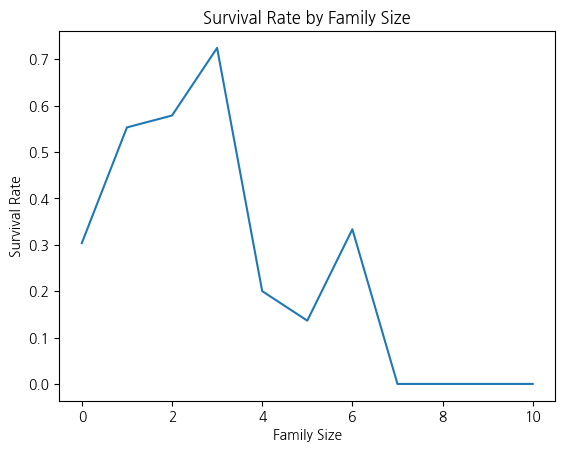

In [ ]:
# 함께 탑승한 가족 수 계산
df['family'] = df['SibSp'] + df['Parch']

# 가족 수에 따른 생존률 계산
survival_by_familysize = df.groupby('family')['Survived'].mean()

print(survival_by_familysize)

survival_by_familysize.plot()
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

#가족의 수가 3명일 때 생존률이 가장 높음음

